# Laptop Price Analysis – Newegg

In this project, laptop data from Newegg was cleaned and analyzed to understand
how RAM and SSD configurations affect laptop prices.


پاکسازی داده(Data Cleaning)

## Data Cleaning

In this section, we clean the raw dataset by:
- Removing empty rows
- Fixing invalid prices
- Standardizing RAM and SSD formats


فراخوانی فایل Excel(Import)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    df = pd.read_excel('newegg.xlsx')
except Exception as e:
    print(f"cant read file {e}")
except FileNotFoundError:
    print("cant find the file")

(Check Data)بررسی اولیه

In [44]:
df.head(3)

,Brand,Color,Price,CPU,Memory,SSD,External GPU
0,GIGABYTE,Black steel,"1,569.00",Intel Core i7-13620H,16 GB DDR5,1 TB,NaN
1,HP,Silver,569.99,AMD Ryzen 5 5000 Series,16GB,256 GB,NaN
2,Acer,Pure Silver,149.99,Intel Core i7 13th Gen,16GB DDR5; 2 x 8GB,512 GB,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         570 non-null    object
 1   Color         563 non-null    object
 2   Price         636 non-null    object
 3   CPU           533 non-null    object
 4   Memory        609 non-null    object
 5   SSD           579 non-null    object
 6   External GPU  60 non-null     object
dtypes: object(7)
memory usage: 35.6+ KB


In [46]:
df.describe(include=object)

,Brand,Color,Price,CPU,Memory,SSD,External GPU
count,570,563,636,533,609,579,60
unique,18,66,74,128,57,36,30
top,Lenovo,Gray,149.99,Intel Core i5 13th Gen,16GB,1 TB,NVIDIA GeForce RTX 5060 Laptop GPU
freq,169,134,106,84,131,177,8


In [47]:
df.shape
df.sample(3)

,Brand,Color,Price,CPU,Memory,SSD,External GPU
158,GIGABYTE,Silver,839.00,Intel Core i5-12500H 2.50 GHz,16 GB LPDDR5,1 TB Gen4,NVIDIA GeForce RTX 4050 Laptop GPUUp to 1605MH...
257,Lenovo,Black,489.00,Intel Core i7 13th Gen,32GB,2 TB,NaN
546,HP,Silver,"1,289.00",AMD Ryzen 7,6GB,1 TB,NaN


In [48]:
df.tail(2)

,Brand,Color,Price,CPU,Memory,SSD,External GPU
646,Lenovo,Gray,556.79,Intel Core i5 13th Gen,16GB,512 GB,NaN
647,Lenovo,Gray,499.79,NaN,8GB,256 GB,NaN


(Type Of Data)نوع داده ها

In [49]:
df["Brand"] = df["Brand"].astype(str)
df["Color"] = df["Color"].astype(str)
df["Price"] = df["Price"].astype(str).str.replace(",", "")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
print(df.dtypes)

Brand            object
Color            object
Price           float64
CPU              object
Memory           object
SSD              object
External GPU     object
dtype: object


(NaN)مقادیر خالی

In [50]:
df.isna().sum()

,0
Brand,0
Color,0
Price,12
CPU,115
Memory,39
SSD,69
External GPU,588


In [51]:
df = df.dropna(thresh=df.shape[1]-3, axis=0)
df = df.reset_index(drop=True)
print(df.head(2))
print(len(df))

      Brand        Color    Price                      CPU      Memory  \
0  GIGABYTE  Black steel  1569.00     Intel Core i7-13620H  16 GB DDR5   
1        HP       Silver   569.99  AMD Ryzen 5 5000 Series        16GB   

      SSD External GPU  
0    1 TB          NaN  
1  256 GB          NaN  
616


In [52]:
df["Brand"] = df["Brand"].fillna("unkonw")
df["CPU"] = df["CPU"].ffill()
df["Memory"] = df["Memory"].bfill()
df["SSD"] = df["SSD"].ffill()
df["External GPU"] = df["External GPU"].fillna("Dont have External GPU(OnBord)")

In [53]:
df["Price"].min(), df["Price"].max()
df = df[df["Price"].between(120, 9000)]
print(len(df))

575


مرتب سازی براساس قیمت

In [54]:
df.sort_values(by="Price", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.head(3))

  Brand           Color    Price                       CPU      Memory  \
0   MSI  Midnight Black  3957.99     AMD Ryzen AI 9 HX 370  64 GB DDR5   
1  ASUS       Off Black  3699.00  Intel Core Ultra 9 275HX  32 GB DDR5   
2   MSI  Midnight Black  3699.00  Intel Core Ultra 9 275HX  64 GB DDR5   

         SSD                          External GPU  
0       2 TB  NVIDIA® GeForce RTX™ 5090 Laptop GPU  
1  2 TB PCIe    NVIDIA GeForce RTX 5090 Laptop GPU  
2       2 TB    NVIDIA GeForce RTX 5090 Laptop GPU  


استخراج ویژگی(Feature Extraction)

## Feature Extraction

RAM and SSD values are extracted from text fields and converted into numerical
values for analysis.


استخراج مقدار عددی RAM و SSD(extract number oh RAM and SSD)

In [55]:
ram = df["Memory"].str.extract(r"(\d+)\s*GB", expand=True)
df["RAM_GB"] = ram[0].astype(float)
ssd = df["SSD"].str.extract(r"(\d+)\s*(GB|TB)", expand=True)
value = ssd[0].astype(float)
key = ssd[1]
df["SSD_GB"] = value
df.loc[key == "TB", "SSD_GB"] *= 1024
df.head(3)

,Brand,Color,Price,CPU,Memory,SSD,External GPU,RAM_GB,SSD_GB
0,MSI,Midnight Black,3957.99,AMD Ryzen AI 9 HX 370,64 GB DDR5,2 TB,NVIDIA® GeForce RTX™ 5090 Laptop GPU,64.0,2048.0
1,ASUS,Off Black,3699.00,Intel Core Ultra 9 275HX,32 GB DDR5,2 TB PCIe,NVIDIA GeForce RTX 5090 Laptop GPU,32.0,2048.0
2,MSI,Midnight Black,3699.00,Intel Core Ultra 9 275HX,64 GB DDR5,2 TB,NVIDIA GeForce RTX 5090 Laptop GPU,64.0,2048.0


In [56]:
df = df.dropna(subset=["SSD_GB"])
df["RAM_GB"] = df["RAM_GB"].fillna(8)
print(len(df))

573


(Final Check)وضعیت نهایی

In [57]:
df.head(3)

,Brand,Color,Price,CPU,Memory,SSD,External GPU,RAM_GB,SSD_GB
0,MSI,Midnight Black,3957.99,AMD Ryzen AI 9 HX 370,64 GB DDR5,2 TB,NVIDIA® GeForce RTX™ 5090 Laptop GPU,64.0,2048.0
1,ASUS,Off Black,3699.00,Intel Core Ultra 9 275HX,32 GB DDR5,2 TB PCIe,NVIDIA GeForce RTX 5090 Laptop GPU,32.0,2048.0
2,MSI,Midnight Black,3699.00,Intel Core Ultra 9 275HX,64 GB DDR5,2 TB,NVIDIA GeForce RTX 5090 Laptop GPU,64.0,2048.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 574
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         573 non-null    object 
 1   Color         573 non-null    object 
 2   Price         573 non-null    float64
 3   CPU           573 non-null    object 
 4   Memory        573 non-null    object 
 5   SSD           573 non-null    object 
 6   External GPU  573 non-null    object 
 7   RAM_GB        573 non-null    float64
 8   SSD_GB        573 non-null    float64
dtypes: float64(3), object(6)
memory usage: 44.8+ KB


In [59]:
df.describe(include='all')

,Brand,Color,Price,CPU,Memory,SSD,External GPU,RAM_GB,SSD_GB
count,573,573,573.000000,573,573,573,573,573.000000,573.000000
unique,19,65,NaN,126,56,34,31,NaN,NaN
top,Lenovo,Gray,NaN,Intel Core i5 13th Gen,16GB,1 TB,Dont have External GPU(OnBord),NaN,NaN
freq,161,131,NaN,107,118,174,513,NaN,NaN
mean,NaN,NaN,825.239599,NaN,NaN,NaN,NaN,19.343805,969.382199
std,NaN,NaN,664.813071,NaN,NaN,NaN,NaN,12.977743,685.486700
min,NaN,NaN,134.990000,NaN,NaN,NaN,NaN,4.000000,64.000000
25%,NaN,NaN,349.000000,NaN,NaN,NaN,NaN,8.000000,512.000000
50%,NaN,NaN,549.990000,NaN,NaN,NaN,NaN,16.000000,1024.000000
75%,NaN,NaN,1249.990000,NaN,NaN,NaN,NaN,32.000000,1024.000000


In [60]:
print(f"Number of rows: {len(df)}")

Number of rows: 573


In [61]:
df.to_excel("output.xlsx")

(Analysis & Reports)گزارش ها

## Analysis & Reports

This section explores pricing patterns based on hardware configurations.


In [62]:
print(f"Number of Laptops: {len(df)}")
print(f"Number of Brands: {len(df['Brand'].unique())}")
print(f"Number of Colors: {len(df['Color'].unique())}")
print(f"Highest Price: {df["Price"].max()}")
print(f"Lowest Price: {df["Price"].min()}")
print(f"Mean Price: {df["Price"].mean().round(2)}")

Number of Laptops: 573
Number of Brands: 19
Number of Colors: 65
Highest Price: 3957.99
Lowest Price: 134.99
Mean Price: 825.24


In [63]:
price_catagory = pd.cut(df["Price"], bins=[100, 500, 1200, 3957.99], labels=["Low", "Medain", "Hight"])
hight_percent = (price_catagory == "Hight").sum() / len(df) * 100
print(f"Hight_percent: {hight_percent.round(2)} %")
medain_percent = (price_catagory == "Medain").sum() / len(df) * 100
print(f"Medain percent: {medain_percent.round(2)} %")
low_percent = (price_catagory == "Low").sum() / len(df) * 100
print(f"Low_percent: {low_percent.round(2)} %")

Hight_percent: 25.13 %
Medain percent: 34.21 %
Low_percent: 40.66 %


In [64]:
ram_catagory_means = df.groupby('RAM_GB')['Price'].mean()
ram_8_mean_of_price = ram_catagory_means.get(8)
ram_16_mean_of_price = ram_catagory_means.get(16)
ram_32_mean_of_price = ram_catagory_means.get(32)

print(f"ram_8_mean_of_price: {ram_8_mean_of_price.round(2)}")
print(f"ram_16_mean_of_price: {ram_16_mean_of_price.round(2)}")
print(f"ram_32_mean_of_price: {ram_32_mean_of_price.round(2)}")

ram_8_mean_of_price: 854.01
ram_16_mean_of_price: 717.71
ram_32_mean_of_price: 968.91


In [65]:
ssd_catagory_means = df.groupby('SSD_GB')['Price'].mean()
ssd_256_mean_of_price = ssd_catagory_means.get(256)
ssd_512_mean_of_price = ssd_catagory_means.get(512)
ssd_1024_mean_of_price = ssd_catagory_means.get(1024)

print(f"ssd_256_mean_of_price: {ssd_256_mean_of_price.round(2)}")
print(f"ssd_512_mean_of_price: {ssd_512_mean_of_price.round(2)}")
print(f"ssd_1024_mean_of_price: {ssd_1024_mean_of_price.round(2)}")

ssd_256_mean_of_price: 553.1
ssd_512_mean_of_price: 652.61
ssd_1024_mean_of_price: 874.38


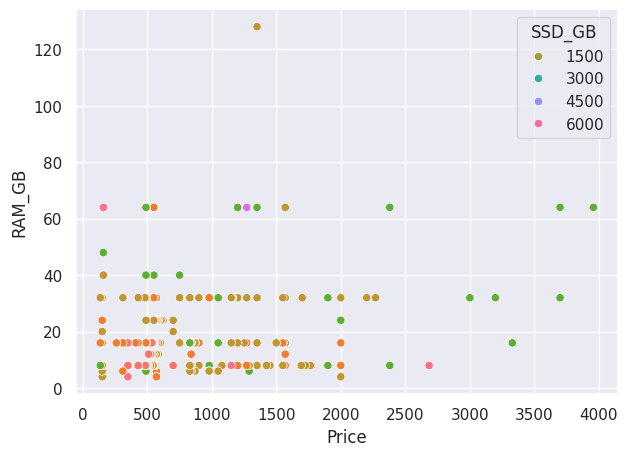

In [66]:
sns.set_theme(style="darkgrid", rc={"figure.figsize":(7, 5)})
sns.set_palette("husl")
sns.scatterplot(data=df, x=df["Price"], y=df["RAM_GB"], hue=df["SSD_GB"], palette="husl")
plt.show()

In [67]:
mean_of_price_brand = df.groupby("Brand")[["Price", "RAM_GB", "SSD_GB"]].mean()
print(mean_of_price_brand.round(2))

             Price  RAM_GB   SSD_GB
Brand                              
ACEMAGIC   1199.99   16.00   512.00
ASUS       1170.96   20.66  1126.82
Acer       1157.65   17.57  1076.87
Aorus      1624.50   32.00  1536.00
Auusda      302.26   11.73   921.60
BiTECOOL    149.99   16.00   512.00
DELL        553.80   25.08  1082.81
Exsurf      246.85   22.86  1024.00
GIGABYTE   1440.60   25.60  1049.60
HP          602.90   20.95   841.31
Hasee       687.00   16.00   768.00
KurieTim    149.99    8.00   512.00
Lenovo      690.68   17.07   884.87
MSI        1407.77   18.70  1296.00
Machenike   489.00    8.00   256.00
Microsoft  1514.46   14.93   631.47
OMEN        134.99   32.00  2048.00
acemagic    839.00   16.00   512.00
nan         574.04   19.31  1064.23


In [68]:
ram_8_percent = (df["RAM_GB"] == 8).sum() / len(df) * 100
print(f"ram_8_percent: {ram_8_percent.round(2)} %")
ram_16_percent = (df["RAM_GB"] == 16).sum() / len(df) * 100
print(f"ram_16_percent: {ram_16_percent.round(2)} %")
ram_32_percent = (df["RAM_GB"] == 32).sum() / len(df) * 100
print(f"ram_32_percent: {ram_32_percent.round(2)} %")
ssd_256_percent = (df["SSD_GB"] == 256).sum() / len(df) * 100
print(f"ssd_256_percent: {ssd_256_percent.round(2)} %")
ssd_512_percent = (df["SSD_GB"] == 512).sum() / len(df) * 100
print(f"ssd_512_percent: {ssd_512_percent.round(2)} %")
ssd_1024_percent = (df["SSD_GB"] == 1024).sum() / len(df) * 100
print(f"ssd_1024_percent: {ssd_1024_percent.round(2)} %")

ram_8_percent: 26.7 %
ram_16_percent: 29.32 %
ram_32_percent: 25.83 %
ssd_256_percent: 8.2 %
ssd_512_percent: 28.45 %
ssd_1024_percent: 48.52 %


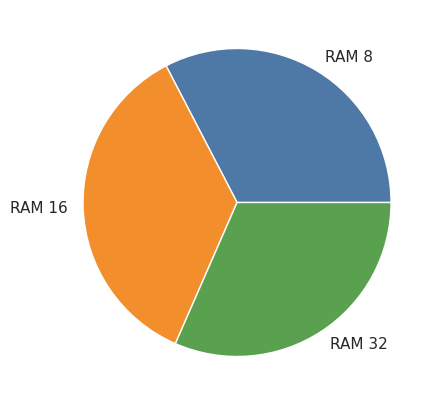

In [69]:
values = [ram_8_percent, ram_16_percent, ram_32_percent]
labels = ["RAM 8", "RAM 16", "RAM 32"]
color = ["#4E79A7", "#F28E2B", "#59A14F"]
plt.pie(values, labels=labels, colors = color)
plt.show()

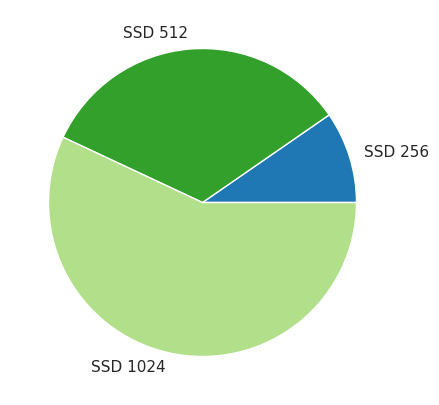

In [70]:
value = [ssd_256_percent, ssd_512_percent, ssd_1024_percent]
labels = ["SSD 256", "SSD 512", "SSD 1024"]
color = ["#1F78B4", "#33A02C", "#B2DF8A"]
plt.pie(value, labels=labels, colors = color)
plt.show()

In [71]:
most_expensive = df.nlargest(5, "Price")
print(most_expensive[["Brand", "Price", "RAM_GB", "SSD_GB"]])
cheapest = df.nsmallest(5, "Price")
print(cheapest[["Brand", "Price", "RAM_GB", "SSD_GB"]])

  Brand    Price  RAM_GB  SSD_GB
0   MSI  3957.99    64.0  2048.0
1  ASUS  3699.00    32.0  2048.0
2   MSI  3699.00    64.0  2048.0
3   MSI  3329.00    16.0  2048.0
4  ASUS  3198.00    32.0  2048.0
    Brand   Price  RAM_GB  SSD_GB
566  ASUS  134.99     8.0  2048.0
567  OMEN  134.99    32.0  2048.0
568   nan  134.99    16.0  2048.0
569    HP  134.99    32.0   512.0
570   nan  134.99    16.0  2048.0


In [72]:
avg_price_by_config = df.groupby(["RAM_GB", "SSD_GB"])["Price"].mean().round(2)
avg_price_by_config = avg_price_by_config.reset_index()
avg_price_by_config = avg_price_by_config.sort_values(by="Price", ascending=False)
print(avg_price_by_config.head(5))

    RAM_GB  SSD_GB    Price
14     8.0  4096.0  1999.99
40    64.0  2048.0  1715.37
24    16.0  5120.0  1569.00
13     8.0  2048.0  1463.45
29    24.0  2048.0  1382.66


In [73]:
mean_of_price_ram = df.groupby("RAM_GB")["Price"].mean().round(2)
mean_of_price_ram = mean_of_price_ram.reset_index()
mean_of_price_ram = mean_of_price_ram.sort_values(by="Price", ascending=False)
print(mean_of_price_ram.head(5))
mean_of_price_ssd = df.groupby("SSD_GB")["Price"].mean().round(2)
mean_of_price_ssd = mean_of_price_ssd.reset_index()
mean_of_price_ssd = mean_of_price_ssd.sort_values(by="Price", ascending=False)
print(mean_of_price_ssd.head(5))

    RAM_GB    Price
11   128.0  1349.99
10    64.0  1307.85
7     32.0   968.91
2      8.0   854.01
0      4.0   829.40
   SSD_GB    Price
8  5120.0  1494.25
6  2048.0  1245.31
7  4096.0   902.99
5  1024.0   874.38
1   128.0   671.83


## Conclusion

After cleaning and preprocessing the laptop dataset collected from Newegg,
hardware features such as RAM and SSD were extracted and standardized for analysis.

The analysis of average prices by hardware configuration shows clear differences
across various RAM and SSD combinations. Results indicate that laptops with higher
RAM capacities generally have higher average prices. While increasing SSD capacity
also leads to higher prices, its impact appears to be less pronounced compared to RAM.

Overall, this project demonstrates how basic exploratory data analysis can reveal
meaningful pricing patterns based on hardware specifications.


## نتیجه‌گیری

پس از پاکسازی و آماده‌سازی داده‌های لپ‌تاپ جمع‌آوری‌شده از سایت Newegg،
اطلاعات مربوط به رم و حافظه SSD استخراج و به قالب عددی استاندارد تبدیل شد.

تحلیل میانگین قیمت بر اساس ترکیب‌های مختلف رم و SSD نشان داد که قیمت لپ‌تاپ‌ها
با افزایش مقدار رم به‌طور قابل‌توجهی افزایش می‌یابد. اگرچه افزایش ظرفیت SSD نیز
باعث افزایش قیمت می‌شود، اما تأثیر آن نسبت به رم کمتر است.

این پروژه نشان می‌دهد که با استفاده از تحلیل اکتشافی داده‌ها می‌توان الگوهای
قیمتی معناداری را بر اساس مشخصات سخت‌افزاری شناسایی کرد.
